# Project Title 

In [1]:
project_title="Titanic Voorspelling - Team 5"

# 1 system setup

Setup packages required for analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline


# 2 Import data

show contents of working directory

In [3]:
train_uitgebreid= pd.read_csv('D:/downloads/train.csv')
print(train_uitgebreid.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# 3 Exploratory Data Analysis

## 3.1 EDA per dataframe

Eerst kijken naar de veldnamen en data types

In [4]:
train_uitgebreid.shape

(891, 12)

In [5]:
train_uitgebreid.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_uitgebreid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3.2 kolommen splitsen / verwijderen / hernoemen / 

**verwijderen**

In [7]:
# Drop the customer id as it is of no use.
train = train_uitgebreid.copy()
train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

**Resultaat** 

In [8]:
print(train.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


## 3.2.1 generieke verkenning

In [9]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [11]:
train.nunique(axis=0)

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

Wat valt op:
* count verschilt bij leeftijd, dus missende waardes
    * gemiddels bijna gelijk aan mediaan, dus mogelijk bijna normaal verdeeld.
* count verschilt bij Embarked, dus missende waardes

In [12]:
# Checking the missing values
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## 3.2 Data analyses on missing data koloms

#### age

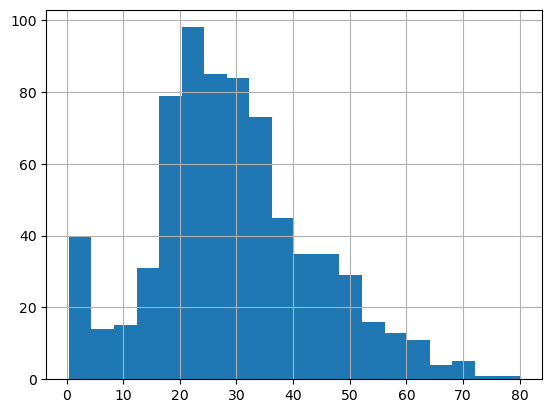

In [13]:
train.Age.hist(bins=20)
plt.show()

De leeftijds histogram lijkt redelijk normaal verdeeld. Daarnaast is het gemiddelde en mediaan bijna gelijk.

#### Embarked

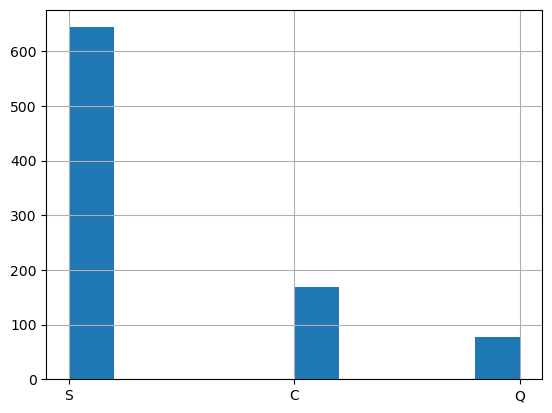

In [14]:
train.Embarked.hist()
plt.show()

Opstaplocatie Southampton is de meest gebruikte locatie om op te stappen. Dit is ook de eerste locatie van de reis.

Correlatie matrix

In [15]:
# correlatie matrix opstellen
# Sex, opstaplocatie omzetten naar getallen
train['Sex'] = train['Sex'].replace({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].replace({'S':1,'C':2,'Q':3})
# Correlatie matrix zelf
correlatie_matrix = train.corr()
print(correlatie_matrix)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age      -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp    -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
Embarked  0.108669  0.043835  0.118593  0.012186 -0.060606 -0.079320   

              Fare  Embarked  
Survived  0.257307  0.108669  
Pclass   -0.549500  0.043835  
Sex       0.182333  0.118593  
Age       0.096067  0.012186  
SibSp     0.159651 -0.060606  
Parch     0.216225 -0.079320  
Fare      1.000000  0.063462  
Embarked  0.063462  1.000000  


C:\Users\user\AppData\Local\Temp\ipykernel_1780\434617791.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace({'male':0, 'female':1})
C:\Users\user\AppData\Local\Temp\ipykernel_1780\434617791.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Embarked'] = train['Embarked'].replace({'S':1,'C':2,'Q':3})


Er valt te zien dan de overlevingskans kleine correlaties toont met geslacht, klasse, opstaplocatie, leeftijd en ticketprijs ticketprijs. Daarnaast is er een kleine, maar niet meegenomen correlatie te zien voor opstaplocatie, met andere variabelen, om de opstaplocatie te bepalen. Met leeftijd is er ook coorelatie te zien naar klassen en broers/zussen/echtgenote, maar deze correlatie nemen we niet mee om de missende waardes voor leeftijd te berekenen. 

# 4. Missing data invullen


#### Age

In [16]:
# leeftijd lege waardes invullen met mediaan
train['Age'].fillna(train['Age'].median(), inplace=True)

# Embarked invullen met modus (meest voorkomende waarde)
train['Embarked'].fillna(1, inplace=True)

train.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_1780\2489787253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1780\2489787253.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 5 Analysis on data

Overleden vs Overleefd

In [17]:
# hoeveel overleefde-overleden
overleden_overleefd = pd.DataFrame(train['Survived'].value_counts())
print(overleden_overleefd)

# hoeveel overleefde-overleden in %
overleden_overleefd_gem = train['Survived'].mean()*100
print('Overal gezien is er een overlevingskans van:',np.round(overleden_overleefd_gem,2),'%')

          count
Survived       
0           549
1           342
Overal gezien is er een overlevingskans van: 38.38 %


Geslacht tegenover overlevingskans

Overlevingsgetal:  Sex
man      109
vrouw    233
dtype: int64
Percentage overlevingskans:  Sex
man      18.89
vrouw    74.20
Name: Survived, dtype: float64


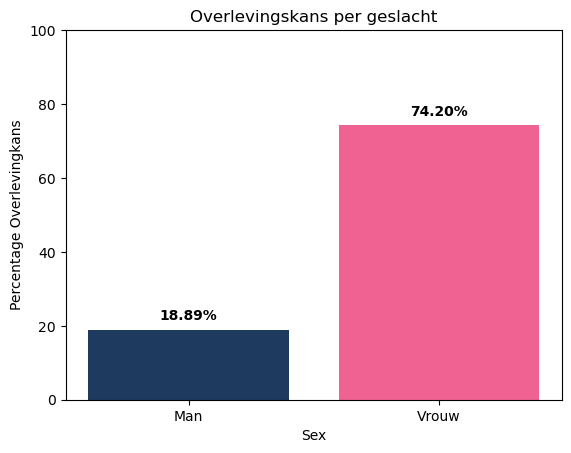

In [18]:
# Survival per geslacht
Sex_survived_getal = train[train['Survived'] == 1].groupby('Sex').size()
gender_mapping_reverse = {0: 'man', 1: 'vrouw'}
Sex_survived_getal.index=Sex_survived_getal.index.map(gender_mapping_reverse)
print('Overlevingsgetal: ', Sex_survived_getal)

# kans survival per geslacht
Sex_survived = (train.groupby('Sex')['Survived'].mean()*100)
Sex_survived.index=Sex_survived.index.map(gender_mapping_reverse)
print('Percentage overlevingskans: ',np.round(Sex_survived,2))


# bar-chart opstellen
fig, ax = plt.subplots()

#Kleur geven
colors = ['#1F3A5F', '#F06292']

#grafiek maken
bars_sex = plt.bar(Sex_survived.index,Sex_survived.values, color = colors)

# opmaak
plt.xlabel('Sex')
plt.xticks(Sex_survived.index, ['Man','Vrouw'])
plt.ylabel ('Percentage Overlevingkans')
plt.ylim(0,100)
plt.title('Overlevingskans per geslacht')

# Annotaties dynamisch bovenop de balken plaatsen
for bar in bars_sex:
    height = bar.get_height()  # Hoogte van de balk
    ax.annotate(f'{height:.2f}%',  # Percentage met 2 decimalen
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Plaatsing bovenop de balk
                xytext=(0, 5),  # Kleine offset omhoog
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# zichtbaar maken
plt.show()

Uit bovenstaande grafiek blijkt dat je beter een vrouw dan een man kon zijn aan boord van de titanic voor je overlevingskans te vergroten. 74% van de vrouwen heeft het overleefd, tegenover 18% van de mannen.
Dat vrouwen en kinderen eerst mochten lijkt hieruit ook naar boven te komen.

Klasse tegenover overlevingskans

Overlevingsgetal:  Pclass
1e klas    136
2e klas     87
3e klas    119
dtype: int64
Overlevingskans per klasse:  Pclass
1e klas    62.96
2e klas    47.28
3e klas    24.24
Name: Survived, dtype: float64


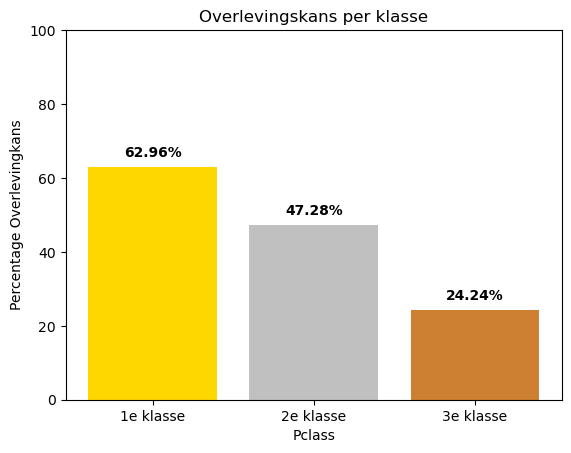

In [19]:
# Survival per klasse
Pclass_survived_getal = train[train['Survived'] == 1].groupby('Pclass').size()
Pclass_mapping_reverse = {1: '1e klas', 2: '2e klas', 3: '3e klas'}
Pclass_survived_getal.index=Pclass_survived_getal.index.map(Pclass_mapping_reverse)
print('Overlevingsgetal: ', Pclass_survived_getal)

# kans survival per class
Pclass_survived = train.groupby(['Pclass'])['Survived'].mean()*100
Pclass_survived.index=Pclass_survived.index.map(Pclass_mapping_reverse)
print('Overlevingskans per klasse: ', np.round(Pclass_survived,2))

#Kleur geven
colors = ['#FFD700', '#C0C0C0', '#CD7F32']

# grafiek maken
fig, ax = plt.subplots()
bars_Pclass = ax.bar(Pclass_survived.index,Pclass_survived.values, color=colors)

# opmaak
plt.xlabel('Pclass')
plt.xticks(Pclass_survived.index, ['1e klasse', '2e klasse', '3e klasse'])
plt.ylabel ('Percentage Overlevingkans')
plt.ylim(0,100)
plt.title('Overlevingskans per klasse')

# Annotaties dynamisch bovenop de balken plaatsen
for bar in bars_Pclass:
    height = bar.get_height()  # Hoogte van de balk
    ax.annotate(f'{height:.2f}%',  # Percentage met 2 decimalen
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Plaatsing bovenop de balk
                xytext=(0, 5),  # Kleine offset omhoog
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# zichtbaar maken
plt.show()

In de eerste klas zijn de meest overlevende mensen 63% waar als je 3e klas zat je 24% overlevingskans had. De mensen in de eerste klas zitten waarschijnlijk meer boven in de boot, waardoor ze sneller bij de reddingsboot waren. Mogelijk is daarnaast door de kosten die ze voor het ticket betaald hebben ook de voorrang aan hun verleend door het personeel. 

Opstaplocatie tegenover overlevingskans

Overlevingsgetal:  Embarked
Southampton    219
Charbourg       93
Qeenstown       30
dtype: int64
Overlevingskans:  Embarked
Southampton    33.90
Charbourg      55.36
Qeenstown      38.96
Name: Survived, dtype: float64


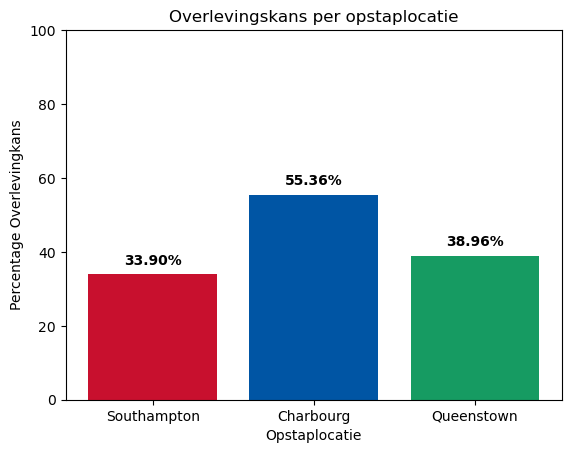

In [20]:
# Survival per opstaplocatie
Emb_survived_getal = train[train['Survived'] == 1].groupby('Embarked').size()
Emb_mapping_reverse = {1: 'Southampton', 2: 'Charbourg', 3: 'Qeenstown'}
Emb_survived_getal.index=Emb_survived_getal.index.map(Emb_mapping_reverse)
print('Overlevingsgetal: ', Emb_survived_getal)

# kans survival per opstaplocatie
Emb_survived = train.groupby('Embarked')['Survived'].mean()*100
Emb_survived.index=Emb_survived.index.map(Emb_mapping_reverse)
print('Overlevingskans: ', np.round(Emb_survived,2))

# bar-chart opstellen
fig, ax = plt.subplots()

#Kleur geven
colors = ['#C8102E', '#0055A4', '#169B62']

#grafiek maken
bars_emb = plt.bar(Emb_survived.index,Emb_survived.values, color = colors)

# opmaak
plt.xlabel('Opstaplocatie')
plt.xticks(Emb_survived.index, ['Southampton','Charbourg', 'Queenstown'])
plt.ylabel ('Percentage Overlevingkans')
plt.ylim(0,100)
plt.title('Overlevingskans per opstaplocatie')

# Annotaties dynamisch bovenop de balken plaatsen
for bar in bars_emb:
    height = bar.get_height()  # Hoogte van de balk
    ax.annotate(f'{height:.2f}%',  # Percentage met 2 decimalen
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Plaatsing bovenop de balk
                xytext=(0, 5),  # Kleine offset omhoog
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')


# zichtbaar maken
plt.show()

De opstaplocatie maakt nog weinig verschil. Opstappen op Cherbourg lijkt de overlevingskans te vergroten tegenover Queenstown en Southampton.

Leeftijds tegenover overlevingskans

Overlevingsgetal:  Leeftijdscategorie
1 - Kind                    49
2 - Jonge Volwassene       199
3 - Volwassene              67
4 - Middelbare Leeftijd     26
5 - Oudere Volwassene        1
dtype: int64
Overlevingskans per leeftijdscategorie Leeftijdscategorie
1 - Kind                   59.04
2 - Jonge Volwassene       34.79
3 - Volwassene             41.61
4 - Middelbare Leeftijd    41.27
5 - Oudere Volwassene       8.33
Name: Survived, dtype: float64


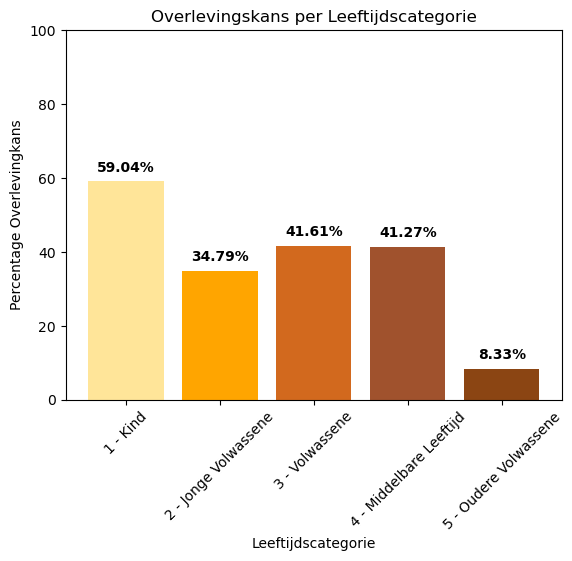

In [21]:
# leeftijdscategorieën opstellen

# Functie om leeftijd in categorieën in te delen
def leeftijdscategorie(leeftijd):
    if leeftijd < 16:
        return '1 - Kind'
    elif 16 <= leeftijd <= 34:
        return '2 - Jonge Volwassene'
    elif 35 <= leeftijd <= 49:
        return '3 - Volwassene'
    elif 50 <= leeftijd <= 64:
        return '4 - Middelbare Leeftijd'
    else:
        return '5 - Oudere Volwassene'

# DataFrame maken en leeftijdscategorieën toewijzen
df = pd.DataFrame({'Leeftijd': train['Age']})
train['Leeftijdscategorie'] = df['Leeftijd'].apply(leeftijdscategorie)

# Survival per Leeftijdscategorie
Age_survived_getal = train[train['Survived'] == 1].groupby('Leeftijdscategorie').size()
print('Overlevingsgetal: ', Age_survived_getal)

#  kans survival per Leeftijdscategorie
Age_survived = train.groupby('Leeftijdscategorie')['Survived'].mean()*100
print('Overlevingskans per leeftijdscategorie',np.round(Age_survived,2))

# Bar-chart opstellen
fig, ax = plt.subplots()

# Kleur per leeftijdscategorie (van licht naar donker)
colors = ['#FFE599', 'orange', 'chocolate', 'sienna', 'saddlebrown']

# Balken tekenen
bars_age = ax.bar(Age_survived.index, Age_survived.values, color=colors)

# Annotaties dynamisch bovenop de balken plaatsen
for bar in bars_age:
    height = bar.get_height()  # Hoogte van de balk
    ax.annotate(f'{height:.2f}%',  # Percentage met 2 decimalen
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Plaatsing bovenop de balk
                xytext=(0, 5),  # Kleine offset omhoog
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Opmaak
plt.xlabel('Leeftijdscategorie')
plt.xticks(rotation=45)
plt.ylabel('Percentage Overlevingkans')
plt.ylim(0, 100)
plt.title('Overlevingskans per Leeftijdscategorie')

# Grafiek tonen
plt.show()

Kinderen lijken de grootste overlevingskans te hebben.

Klasse met filter op geslacht tegenover overlevingskans

man Pclass
1e klas    36.89
2e klas    15.74
3e klas    13.54
Name: Survived, dtype: float64
vrouw Pclass
1e klas    96.81
2e klas    92.11
3e klas    50.00
Name: Survived, dtype: float64


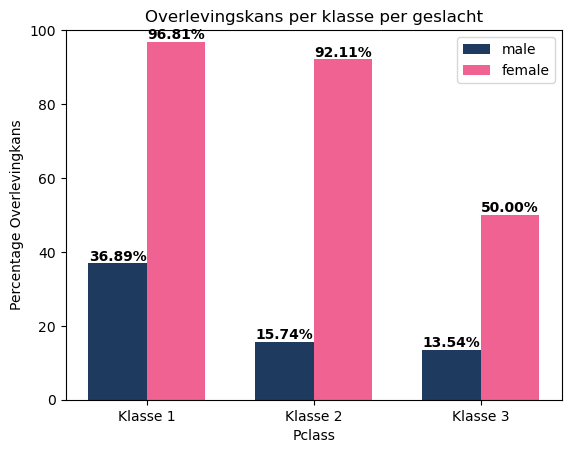

In [22]:
# kan survival per class - man
Pclass_male = train.groupby(['Sex','Pclass'])['Survived'].mean().loc[0]*100
Pclass_male.index=Pclass_male.index.map(Pclass_mapping_reverse)
print('man', np.round(Pclass_male,2))

# kan survival per class - man
Pclass_female = train.groupby(['Sex','Pclass'])['Survived'].mean().loc[1]*100
Pclass_female.index=Pclass_female.index.map(Pclass_mapping_reverse)
print('vrouw', np.round(Pclass_female,2))

# bar-chart opstellen
fig, ax = plt.subplots()
Pclass_labels = sorted(train['Pclass'].unique())

#Kleur geven
x=np.arange(len(Pclass_labels))
width = 0.35

#grafiek maken
Bars_Pclass_m = ax.bar(x-width/2,Pclass_male,width,label='male', color = '#1F3A5F')
Bars_Pclass_f = ax.bar(x+width/2,Pclass_female,width,label='female', color = '#F06292')

# opmaak
plt.xlabel('Pclass')
plt.xticks(x)
plt.ylabel ('Percentage Overlevingkans')
plt.ylim(0,100)
plt.title('Overlevingskans per klasse per geslacht')
ax.set_xticklabels([f'Klasse {p}' for p in Pclass_labels]) 

# **Dynamische annotaties toevoegen**
for bar in Bars_Pclass_m + Bars_Pclass_f:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',  # Tekst met 2 decimalen
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Bovenop de balk
                xytext=(0, 0),  # Kleine offset omhoog
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.legend()

# zichtbaar maken
plt.show()

Voor mannen was de overlevingskans in de eerste klas hoger dan in de 2e of 3e klas. In de eerste klas zitten gaf een man een hogere overlevingskans dan algemeen gezien, onder de mannen. Voor vrouwen is de overlevinskans in de 1e en 2e klas heel hoog. In de 3e klas zitten maakt gelijk de overlevingskans lager, ook lager dan de gemiddelde overlevingskans van de vrouw. Voor in het vervolg kan er specifiek gekeken worden naar mannen in de 1e (en 2e) klasse en vrouwen in de derde klasse, om dit allemaal te specificeren.

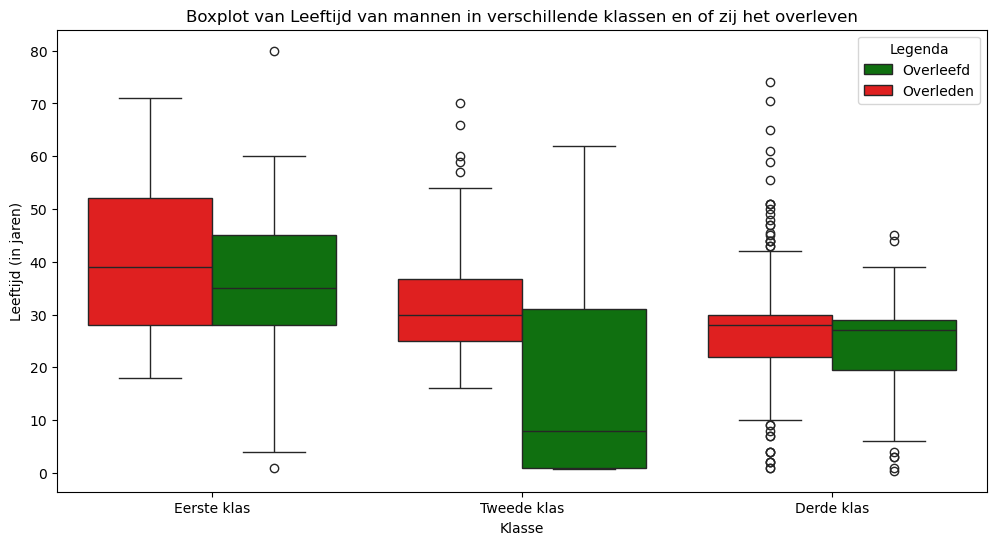

In [23]:
# df maken van mannen aan boord en daarna apart voor de 1e, 2e en 3e klas
mannenaanboord = train[train['Sex'] == 0].copy()
m_1eklas_aanboord = mannenaanboord[mannenaanboord['Pclass'] == 1]
m_2eklas_aanboord = mannenaanboord[mannenaanboord['Pclass'] == 2]
m_3eklas_aanboord = mannenaanboord[mannenaanboord['Pclass'] == 3]

# zorgen dat de klassen categorieën zijn en niet getallen (floats)
mannenaanboord.loc[:, 'Pclass_str'] = mannenaanboord['Pclass'].astype(str)

# Maak de plot
plt.figure(figsize=(12, 6))

# Boxplot maken per klasse, volgorde en kleur
sns.boxplot(x='Pclass_str', y='Age', hue='Survived', data=mannenaanboord, order=['1', '2', '3'], palette={0: 'red', 1: 'green'})

# Labels toevoegen
plt.title('Boxplot van Leeftijd van mannen in verschillende klassen en of zij het overleven')
plt.xlabel('Klasse')
plt.ylabel('Leeftijd (in jaren)')
plt.xticks([0, 1, 2], ['Eerste klas', 'Tweede klas', 'Derde klas'])

# Legenda aanpassen
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=[handles[1], handles[0]], labels=['Overleefd', 'Overleden'], title='Legenda', loc='upper right')

# Toon de plot
plt.show()


Hieruit blijkt dat er bij de mannen van de eerste en tweede klassen niemand onder de 16 jaar is overleden.
Verder is te zien dat bij de derde klasse de spreiding te groot is om een duidelijke categorie te passen.

Opstaplocatie met filter op geslacht tegenover overlevingskans

Overlevingskans voor man bij opstaplocatie : Embarked
Southampton    35.44
Charbourg      40.48
Qeenstown       0.00
Name: Survived, dtype: float64
Overlevingskans voor vrouw bij opstaplocatie : Embarked
Southampton    37.50
Charbourg      65.22
Qeenstown      72.73
Name: Survived, dtype: float64


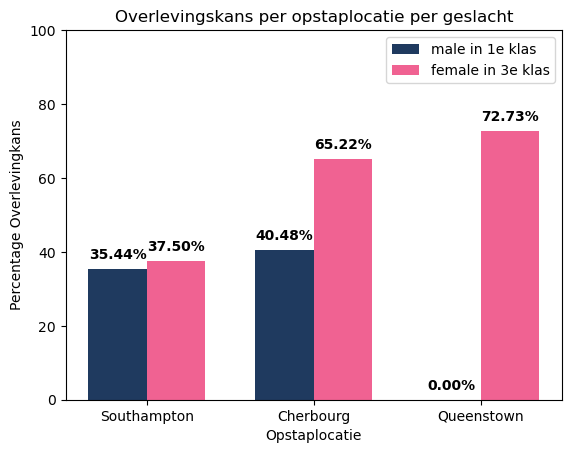

In [24]:
# kan survival per class - man
Emb_male = train.groupby(['Sex','Pclass','Embarked'])['Survived'].mean().loc[(0,1)]*100
Emb_male.index=Emb_male.index.map(Emb_mapping_reverse)
print('Overlevingskans voor man bij opstaplocatie :', np.round(Emb_male,2))

# kan survival per class - man
Emb_female = train.groupby(['Sex','Pclass','Embarked'])['Survived'].mean().loc[(1,3)]*100
Emb_female.index=Emb_female.index.map(Emb_mapping_reverse)
print('Overlevingskans voor vrouw bij opstaplocatie :', np.round(Emb_female,2))

# bar-chart opstellen
fig, ax = plt.subplots()

embarked_mapping = {2: 'Cherbourg', 3: 'Queenstown', 1: 'Southampton'}
Emb_labels = sorted(train['Embarked'].dropna().unique())
#Kleur geven
x=np.arange(len(Emb_labels))
width = 0.35

#grafiek maken
bars_male= ax.bar(x-width/2,Emb_male,width,label='male in 1e klas', color = '#1F3A5F')
bars_female= ax.bar(x+width/2,Emb_female,width,label='female in 3e klas', color = '#F06292')

# opmaak
plt.xlabel('Opstaplocatie')
plt.xticks(x)
plt.ylabel ('Percentage Overlevingkans')
plt.ylim(0,100)
plt.title('Overlevingskans per opstaplocatie per geslacht')
ax.set_xticklabels([embarked_mapping[p] for p in Emb_labels])

# **Dynamische annotaties toevoegen**
for bar in bars_male + bars_female:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',  # Tekst met 2 decimalen
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Bovenop de balk
                xytext=(0, 5),  # Kleine offset omhoog
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')
ax.legend()

# zichtbaar maken
plt.show()

Hierboven blijkt dat vrouwen die op Southampton opstappen een minder grote overlevingskans hebben dan vrouwen die opstappen bij Queenstown en Cherbourg. 

Mannen lijken nogsteeds sneller te overleiden dan te overleven tussen de opstaplocaties. Nu is het wel zo dat mannen in de 1e klas die opstappen op queenstown sowieso lijken te overleiden, maar na even naar de data kijken blijkt dat er maar 1 man is opgestapt in Queenstown in de 1e klas en hij is overleden.

Leeftijd met een filter op mannelijk geslacht en 1e en 2e klasse tegenover overlevingskans

man_1 Leeftijdscategorie
1 - Kind                   100.000000
2 - Jonge Volwassene        36.000000
3 - Volwassene              45.000000
4 - Middelbare Leeftijd     21.739130
5 - Oudere Volwassene       16.666667
Name: Survived, dtype: float64
man_2 Leeftijdscategorie
1 - Kind                   100.000000
2 - Jonge Volwassene         8.955224
3 - Volwassene               5.263158
4 - Middelbare Leeftijd      9.090909
5 - Oudere Volwassene        0.000000
Name: Survived, dtype: float64


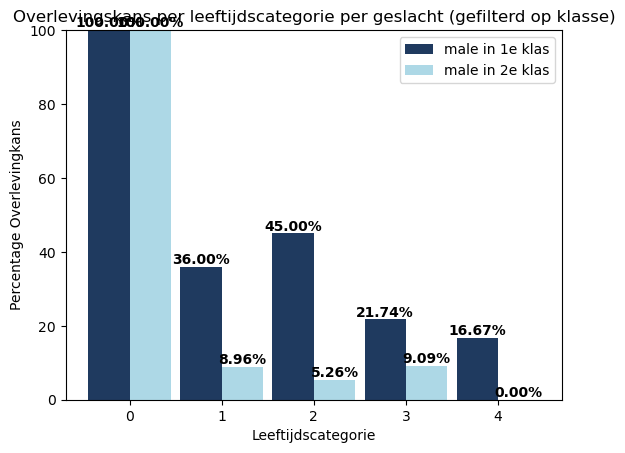

In [25]:
# kan survival per class - man
Age_male = train.groupby(['Sex', 'Pclass','Leeftijdscategorie'])['Survived'].mean().loc[(0,1)]*100
print('man_1', Age_male)

# kan survival per class - man
Age_male_2e = train.groupby(['Sex', 'Pclass', 'Leeftijdscategorie'])['Survived'].mean().loc[(0,2)]*100
print('man_2', Age_male_2e)

# bar-chart opstellen
fig, ax = plt.subplots()

Age_labels = sorted(train['Leeftijdscategorie'].dropna().unique())
#Kleur geven
x=np.arange(len(Age_labels))
width = 0.45

#grafiek maken
bar_age_m1 = ax.bar(x-width/2,Age_male,width,label='male in 1e klas', color = '#1F3A5F')
bar_age_m2 = ax.bar(x+width/2,Age_male_2e,width,label='male in 2e klas', color = 'lightblue')

# opmaak ax1
ax.set_xlabel('Leeftijdscategorie')
ax.set_xticks(x)
ax.set_ylabel ('Percentage Overlevingkans')
ax.set_ylim(0,100)
ax.set_title('Overlevingskans per leeftijdscategorie per geslacht (gefilterd op klasse)')
ax.legend()


# Annotaties dynamisch bovenop de balken plaatsen
for bar in bar_age_m1 + bar_age_m2:
    height = bar.get_height()  # Hoogte van de balk
    ax.annotate(f'{height:.2f}%',  # Percentage met 2 decimalen
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Plaatsing bovenop de balk
                xytext=(0, 0),  # Kleine offset omhoog
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

Mannen in de 1e klas onder de 16 overleven het. Daarnaast ook alle mannen onder de 16 in de 2e klas overleven het. Voor de rest geven de waardes geen grote overlevingskans weer.

Prijsklasse in de 1e klas tegenover overlevingskans

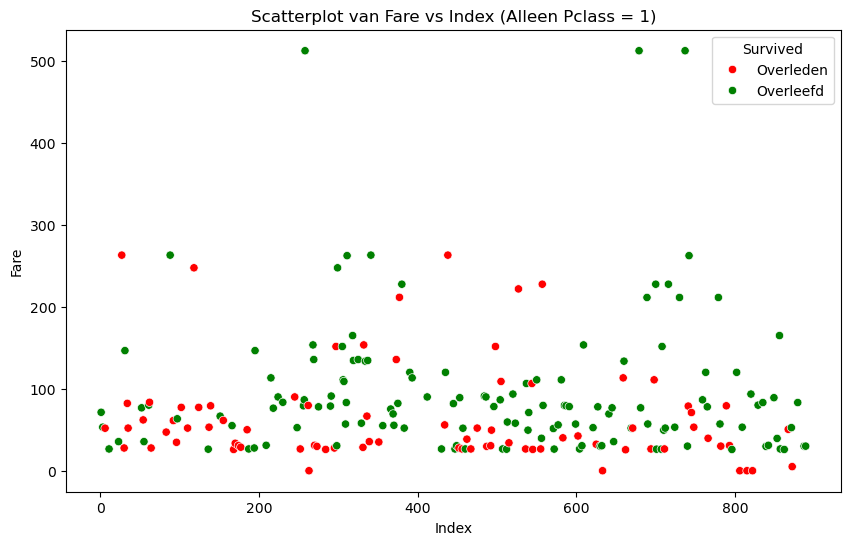

In [26]:
# Filter alleen passagiers met Pclass = 1
df_first_class = train[train['Pclass'] == 1].copy()
 
# Voeg een nieuwe kolom met de index toe aan df_first_class
df_first_class['Index'] = df_first_class.index
 
# Maak een scatterplot met seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_first_class,
    x='Index',
    y='Fare',
    hue='Survived',
    palette={0: 'red', 1: 'green'}  
)
 
# Voeg titels en labels toe
plt.title('Scatterplot van Fare vs Index (Alleen Pclass = 1)')
plt.xlabel('Index')
plt.ylabel('Fare')
 
# Pas de legenda aan met correcte labels
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Overleden', 'Overleefd']  
plt.legend(handles, labels, title='Survived', loc='upper right')
 
# Toon de plot
plt.show()

# 6 Building a model

In [27]:
test = pd.read_csv('D:downloads/test.csv')

# leeftijd & opstaplocatie lege waardes invullen met mediaan
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Embarked'].fillna('S', inplace=True)

# Creëer een nieuwe kolom 'Survived' en zet deze standaard op 0
test['Survived'] = 0

# Regel 1: Update de kolom 'Survived' naar 1 voor vrouwen in de Pclass 1,2
test['Survived'] = np.where((test['Sex'] == 'female') & (test['Pclass'] <= 2), 1, test['Survived'])

# Regel 2: Update de kolom 'Survived' naar 1 voor vrouwen in de Pclass 3 en opstaplocatie 0,1 (C,Q)
test['Survived'] = np.where((test['Sex'] == 'female') & (test['Pclass'] == 3) & test['Embarked'].isin(['C', 'Q']), 1,test['Survived'])

# Regel 3: Update de kolom 'Survived' naar 1 voor mannen in de Pclass 1,2 die jonger dan 16 zijn
test['Survived'] = np.where((test['Sex'] == 'male') & (test['Pclass'] <= 2) & (test['Age'] < 16), 1,test['Survived'])

# Regel 4: Update de kolom 'Survived' naar 1 voor Pclass 1 die meer dan 400 hebben betaald
test['Survived'] = np.where((test['Pclass'] == 1) & (test['Fare'] >= 400), 1,test['Survived'])

# export voor eigen gebruik
export_test_3 = test[['PassengerId', 'Survived', 'Sex','Age', 'Pclass', 'Fare']]
export_test_3.to_csv('export_test_3.csv', index = False)

# export voor inlevering
export_test_1 = test[['PassengerId', 'Survived']]
export_test_1.to_csv('export_test_1.csv', index = False)

C:\Users\user\AppData\Local\Temp\ipykernel_1780\2406479346.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1780\2406479346.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Dit algoritme geeft een voorspelling dat voor 78,46% accuraat is, het algoritme voorspeld dat:
- Alle vrouwen van klasse 1 en 2 zullen overleven
- Alle vrouwen van klasse 3 die als opstaplocatie Charbourg of Queenstown hadden het zullen overleven
- Alle mannen onder de 16 jaar van klasse 1 en 2 zullen overleven
- Alle passagiers van klasse 1 met een ticketprijs boven de 400 (valuta onbekend) zullen overleven

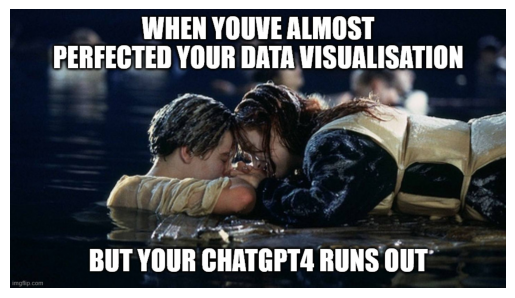

In [28]:
from PIL import Image
 
# Open an image file
img = Image.open('D:/Downloads/funnymeme.jpg')  # Replace with your image path
 
# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()